**Official documentation page:**

https://spacy.io/universe/project/spacy-textblob

In [1]:
%%capture
pip install spacytextblob

In [2]:
import numpy as np 
import pandas as pd 
import spacy
from IPython.display import Markdown as md
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

In [3]:
# User input text
user_input = 'This is an amazing app'

In [4]:
df=pd.read_csv("../input/twitter-reacts-to-johnny-depps-win-dataset/twitter.csv")
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1532147780415651840,1532147780415651840,2022-06-01 23:51:11 UTC,2022-06-01,23:51:11,0,1323523071035146242,dauz4trump,Gladioli Dauz,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1532147777978892288,1532146033484079104,2022-06-01 23:51:10 UTC,2022-06-01,23:51:10,0,1162438416744767489,charley841,Charley84,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'calgarysun', 'name': 'Calgar...",NaN,NaN,NaN,NaN
2,1532147760211828736,1532147760211828736,2022-06-01 23:51:06 UTC,2022-06-01,23:51:06,0,1451573961741983751,lurkingbatman,Bohack Mohack 🪵🔥,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1532147759029043202,1532147759029043202,2022-06-01 23:51:06 UTC,2022-06-01,23:51:06,0,127021956,danydrugs,Danydrugs,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1532147757938528256,1532147757938528256,2022-06-01 23:51:06 UTC,2022-06-01,23:51:06,0,1462205842099511299,rajak63518442,RaJak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [6]:
df['tweet']

0        LIVE: Watch verdict in Johnny Depp Amber Heard...
1        @calgarysun "Tell them, I, Johnny Depp, I'm a ...
2        Except you didn’t say that the jury said Amber...
3        Hoy Twitter Mexico fue como ver un programa de...
4        The punitive damages tells what the jury was t...
                               ...                        
10002    no voy a discutir  sobre quien es más culpable...
10003    @skzfurryera the fallout from the Johnny depp ...
10004    Johnny Depp vs Amber Heard Trial - Jack Sparro...
10005    My thoughts on the Amber Heard - Johnny Depp t...
10006    Messi 🐐 won, Zinchenko won Johnny Depp won and...
Name: tweet, Length: 10007, dtype: object

In [7]:
nlp = spacy.load('en_core_web_sm')
_=nlp.add_pipe('spacytextblob')

In [8]:
tweets=df[df['language']=='en'].tweet #Conducting analysis only for English language tweets

In [9]:
tweets=tweets.to_list() #converting it to list

In [10]:
from tqdm import tqdm

In [11]:
headers = ["Negative", "Neutral", "Positive"]

In [12]:
headers[1]

'Neutral'

In [13]:
sentiment=[]
score=[]
for i in tqdm(range(0,len(tweets))):
    score.append(nlp(tweets[i])._.polarity) #The threshold was selected based on the distribution of the values. The distribuition can be seen below
    if score[i] >= 0.1:
        index = 2
        sentiment.append(headers[index])
    elif score[i] < 0:
        index = 0
        sentiment.append(headers[index])
    else:
        index=1
        sentiment.append(headers[index])
    
    
    

100%|██████████| 6757/6757 [01:36<00:00, 70.36it/s]


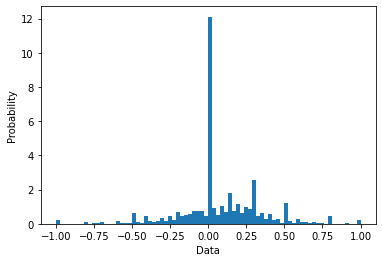

In [14]:
q25, q75 = np.percentile(score, [25, 75])
bin_width = 2 * (q75 - q25) * len(score) ** (-1/3)
bins = round((np.max(score) - np.min(score)) / bin_width)
plt.hist(score, density=True, bins=bins)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [15]:
np.unique(sentiment, return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype='<U8'),
 array([1527, 2504, 2726]))

In [16]:
data = pd.DataFrame(list(zip(tweets,score, sentiment)), columns = ['tweets','polarity', 'sentiment'])

In [17]:
len(tweets)

6757

In [18]:
len(sentiment)

6757

In [19]:
data

,tweets,polarity,sentiment
0,LIVE: Watch verdict in Johnny Depp Amber Heard...,0.136364,Positive
1,"@calgarysun ""Tell them, I, Johnny Depp, I'm a ...",0.141667,Positive
2,Except you didn’t say that the jury said Amber...,0.250000,Positive
3,The punitive damages tells what the jury was t...,0.000000,Neutral
4,And Johnny Depp states: “ The Best Is Yet To C...,1.000000,Positive
...,...,...,...
6752,Johnny Depp Awarded More Than $10M in Libel Su...,0.500000,Positive
6753,@skzfurryera the fallout from the Johnny depp ...,-0.419643,Negative
6754,Johnny Depp vs Amber Heard Trial - Jack Sparro...,0.000000,Neutral
6755,My thoughts on the Amber Heard - Johnny Depp t...,0.000000,Neutral


[Text(0, 0, '2726'), Text(0, 0, '2504'), Text(0, 0, '1527')]

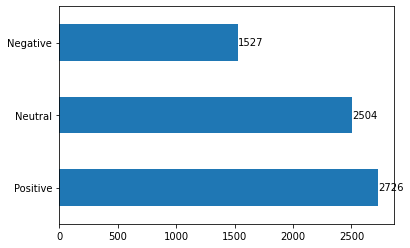

In [20]:
ax = data.sentiment.value_counts().plot.barh()

ax.bar_label(ax.containers[0])

In [21]:
negative=data[data.sentiment=='Negative'].reset_index(drop=True)
negative

,tweets,polarity,sentiment
0,"bruh, I'm just glad the Johnny Depp and Amber ...",-0.107143,Negative
1,The whole world at this point is aware of the ...,-0.158333,Negative
2,listen babes abuse is serious. so is lying. s...,-0.204167,Negative
3,@VanDerMohammed Just leave her be Jesus Christ...,-1.000000,Negative
4,JOHNNY DEPP WINS! Amber Heard FOUND GUILTY of ...,-0.125000,Negative
...,...,...,...
1522,finally the johnny depp amber heard shit is ov...,-0.200000,Negative
1523,JOHNNY DEPP WINS! Amber Heard FOUND GUILTY of ...,-0.125000,Negative
1524,JOHNNY FUCKING DEPP HAS WON HIS DEFAMATION LAW...,-0.750000,Negative
1525,@uzohak @Jessica86734608 @StevieLeeStorm I lov...,-0.025000,Negative


**Negative tweet example**

In [22]:
negative.tweets[6]

'The Johnny Depp and Amber Heard shit show has finally ended with Heard owing Depp 13 million in damages.'

In [23]:
positive=data[data.sentiment=='Positive'].reset_index(drop=True)
positive

,tweets,polarity,sentiment
0,LIVE: Watch verdict in Johnny Depp Amber Heard...,0.136364,Positive
1,"@calgarysun ""Tell them, I, Johnny Depp, I'm a ...",0.141667,Positive
2,Except you didn’t say that the jury said Amber...,0.250000,Positive
3,And Johnny Depp states: “ The Best Is Yet To C...,1.000000,Positive
4,I completely disagree. All of us are flawed. T...,0.280000,Positive
...,...,...,...
2721,Social media was quick to respond to the verdi...,0.183333,Positive
2722,"So, basically, ""you're both assholes. one of y...",0.187500,Positive
2723,🚨 | Johnny Depp wins the defamation lawsuit a...,0.150000,Positive
2724,Johnny Depp Awarded More Than $10M in Libel Su...,0.500000,Positive


**Positive tweet example**

In [24]:
positive.tweets[3]

'And Johnny Depp states: “ The Best Is Yet To Come.”    Hmmm. Where have we heard THAT before? Yay Johnny! #NCSWIC #DeppVHeardTrial #LFG'

In [25]:
neutral=data[data.sentiment=='Neutral'].reset_index(drop=True)
neutral

,tweets,polarity,sentiment
0,The punitive damages tells what the jury was t...,0.000,Neutral
1,“Johnny Depp’s fantasy was to Murder His Wife ...,0.000,Neutral
2,Na Amber Heard and Johnny Depp run case na Dam...,0.000,Neutral
3,"Today, my wife met a real-life adult human who...",0.075,Neutral
4,@CBSNews Oh pleeaassee stop the BS…Amber Heard...,0.000,Neutral
...,...,...,...
2499,Now that the Johnny Depp and Amber Heard trial...,0.000,Neutral
2500,Johnny Depp and Amber Heard Defamation Trial R...,0.000,Neutral
2501,Justice For Johnny Depp Is Served!! Amber Hea...,0.000,Neutral
2502,Johnny Depp vs Amber Heard Trial - Jack Sparro...,0.000,Neutral


**Neutral tweet example**

In [26]:
neutral.tweets[3]

"Today, my wife met a real-life adult human who has actually been watching the Johnny Depp/Amber Heard trial. I didn't think those were real."

**The results seem to be accurate.** 

**SpacyTextBlob has done a great job for the baseline.**

More developments can be done by incroporating contexts to the text. The analysis could be improved if we can conduct multi label analysis. Multi label analysis could help to understand the sentiments better. 